# Exploratory data visualization

Data exploration is an important step in the data analysis process. It can highlight anomalies or interesting trends, and reveal how the data are distributed. 

This notebook explains how to visually explore data by creating plots using the popular [seaborn](https://seaborn.pydata.org/) and [matplotlib](https://matplotlib.org/) libraries.

It will include the following plots:

- Histogram
- Stacked histogram
- Kernel density plot
- Bar chart
- Line chart
- Scatter plot with trend line

## Install and import libraries

If you haven't already done so, install the following libraries using `pip`:

In [ ]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

Now import them using their common aliases. Note that `pyplot` is a *module* of the `matplotlib` library:

In [39]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## Load bike share data

The dataset we'll be working with is Bike Share Toronto ridership data from January 2022. It's already been downloaded for you, so you can just load it below using the [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function from the `pandas` library.

However, if you want to download the data yourself...

1. Go to [this page](https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/) from the City of Toronto's Open Data portal
2. Click on the blue "Download" bar towards the bottom
3. Download the `bikeshare-ridership-2022` zip file
4. Unzip the file and open the folder
5. Save the `Bike share ridership 2022-01.csv` file
6. Make sure you read the file using the correct filepath

In [40]:
df = pd.read_csv("data/Bike share ridership 2022-01.csv")

Let's take a look at the first 5 rows of the dataframe:

In [41]:
df.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,14805109,4335,7334,01/01/2022 00:02,Simcoe St / Wellington St North,7269.0,01/01/2022 01:15,Toronto Eaton Centre (Yonge St),5139,Casual Member
1,14805110,126,7443,01/01/2022 00:02,Dundas St E / George St,7270.0,01/01/2022 00:05,Church St / Dundas St E - SMART,3992,Annual Member
2,14805112,942,7399,01/01/2022 00:04,Lower Jarvis / Queens Quay E,7686.0,01/01/2022 00:19,NaN,361,Annual Member
3,14805113,4256,7334,01/01/2022 00:04,Simcoe St / Wellington St North,7269.0,01/01/2022 01:15,Toronto Eaton Centre (Yonge St),4350,Casual Member
4,14805114,4353,7334,01/01/2022 00:05,Simcoe St / Wellington St North,7038.0,01/01/2022 01:17,Dundas St W / Yonge St,5074,Casual Member


**What do you notice about the data? Which variables are you interested in exploring?**

## Histogram

**How long do bike share trips last?**

Let's start by looking at the trip duration column to see how long people are travelling when using the bike share.

The "Trip Duration" column is in seconds, which is hard to interpret -- to make it easier, let's create a column for minutes by dividing by 60. We can then compute some simple summary statistics on the column using the [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) method from `pandas`.

In [42]:
df["Trip Duration Minutes"] = df["Trip  Duration"] / 60
df["Trip Duration Minutes"].describe()

count    56765.000000
mean        14.930107
std        206.125166
min          0.000000
25%          6.183333
50%         10.016667
75%         16.050000
max      38095.650000
Name: Trip Duration Minutes, dtype: float64

Now we have the mean, standard deviation, and quantiles. The average trip length is about 15 minutes, which seems reasonable. However, the maximum trip length is about 635 hours! That doesn't seem right -- when analyzing this data, we would need to make a decision about how to handle this value. For example, we might filter it out if we're confident it's an error. Or maybe it's part of a larger pattern of people who forget to dock their bikes.

The fact that the median (the "50%" statistic from above) is lower than the mean shows that the data are right-skewed -- most values are clustered at the lower end of the range -- and there are some large outliers.

Let's plot a *[histogram](https://en.wikipedia.org/wiki/Histogram)* to show the distribution of shorter trips (those less than 2 hours long) using the [`displot`](https://seaborn.pydata.org/generated/seaborn.displot.html) function from the `seaborn` package. Refer to this documentation to understand each of the parameters/arguments used to create the plots below.

We'll start by filtering the data to only rows where the "Trip Duration Minutes" column value is less than or equal to 120, using [`loc`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html). Note that we're only selecting the column itself because that's the only data we need for this plot.

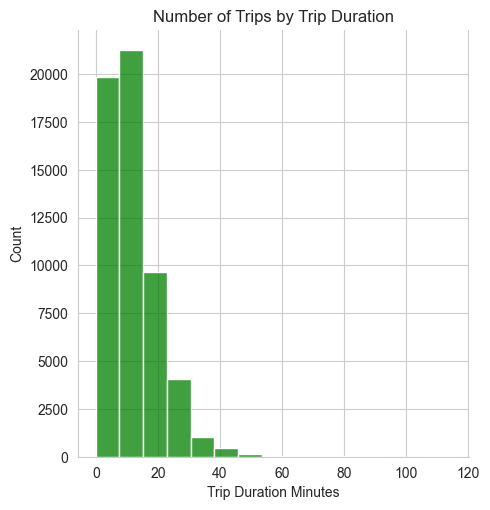

In [156]:
sns.set_style("whitegrid") # set style to make plots look nicer

# Filter the data
trips_120_duration = df.loc[df["Trip Duration Minutes"] <= 120, "Trip Duration Minutes"]

# Create the plot, with 15 bins, and make it green
sns.displot(trips_120_duration,
            bins = 15,
            color = "green"
            ).set(title = "Number of Trips by Trip Duration")

sns.despine() # get rid of plot borders for cleaner look

According to this plot, trips are typically fairly short, with the majority of trip durations well below 20 minutes. There are a small number of trips that are longer than 40 minutes but these are relatively rare.

**If you are using spreadsheet software such as Excel and Google Sheets**, try to run the same steps as noted above, using the skills previously covered in this textbook. Here are a few tips and reminders: 

- Create a new column to calculate trip length in minutes instead of seconds. For example, if trip length in seconds is in an existing column, column C, and you add a new column D, you would write this function for column D, in your D2 cell: D2=C2/60, and then drag it all the way down all your rows.

- You can then calculate all your key summary statistics manually by using the appropriate Excel or Google Sheets formulas as noted in previous sections of this textbook (e.g. =AVERAGE, =MAX, etc.) 
- You can also create a histogram of the trip length in minutes column by selecting the appropriate data array, clicking ‘Insert’, then selecting ‘Histogram’. 

    - As noted above, there are outliers in this dataset (e.g. trip lengths of 300 or even 635 hours!) that you may want to delete or exclude from your analysis. 
    
- If you want to reproduce the histogram shown above (i.e., only trips that are under 120 minutes), you will need to run additional manual steps to exclude trips that are longer than 120 minutes. There are different ways to do this. For example, you could sort the data from smallest to largest and manually select the appropriate array or copy that subset of the dataset you want to manipulate into a new tab. Alternatively, you could create a new column to categorize each trip as either under or over 120 minutes (using the =IF function), and then use this new column to easily filter your data using the Sort & Filter function, and then insert your Histogram after the data is filtered. 

## Stacked histogram

**How does trip duration vary by user type?**

Next, let's create a *stacked histogram* that shows trip duration for casual versus annual members. Unlike the previous plot, we'll need more than just the "Trip Duration Minutes" column because we're also plotting by "User Type".

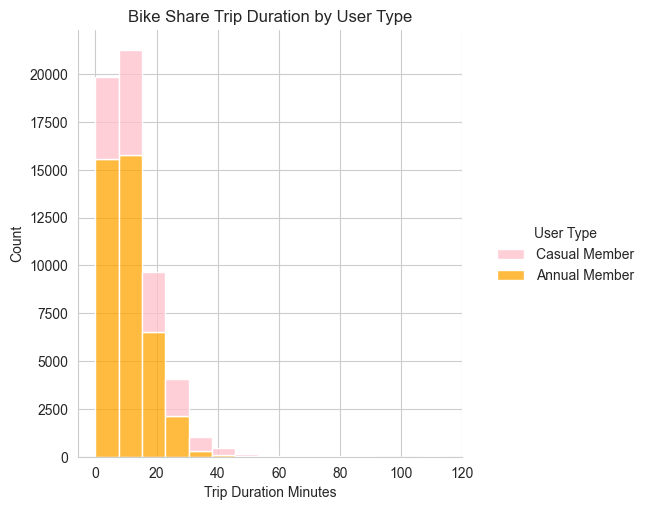

In [155]:
trips_120 = df.loc[df["Trip Duration Minutes"] <= 120]

sns.displot(data=trips_120,
            x="Trip Duration Minutes",
            multiple="stack",
            bins=15,
            hue="User Type",
            palette=["pink", "orange"]
            ).set(title = "Bike Share Trip Duration by User Type")

sns.despine()

This stacked histogram shows that shorter trips (<20 minutes) are most common for both types of members. There are far fewer trips taken by casual members compared to annual members.

**To create a stacked histogram in Excel**, follow [these instructions](https://www.thebricks.com/resources/guide-how-to-make-a-stacked-histogram-in-excel).

## Kernel density plot

**How does the number of trips vary by day, for each user type?**

What if we want to plot the number of trips by day of the month, colored by user type? Let's start with a *[kernel density plot](https://en.wikipedia.org/wiki/Kernel_density_estimation)*.

First we need to convert the "Start Time" column to a *datetime* object using [`pandas.to_datetime`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) so that we can sort by date.

In [ ]:
df['Start Date'] = pd.to_datetime(df['Start Time'], format='%m/%d/%Y %H:%M')
df_sorted_date = df.sort_values('Start Date')
df_sorted_120 = df_sorted_date.loc[df_sorted_date["Trip Duration Minutes"] <= 120]

Now let's make the plot:

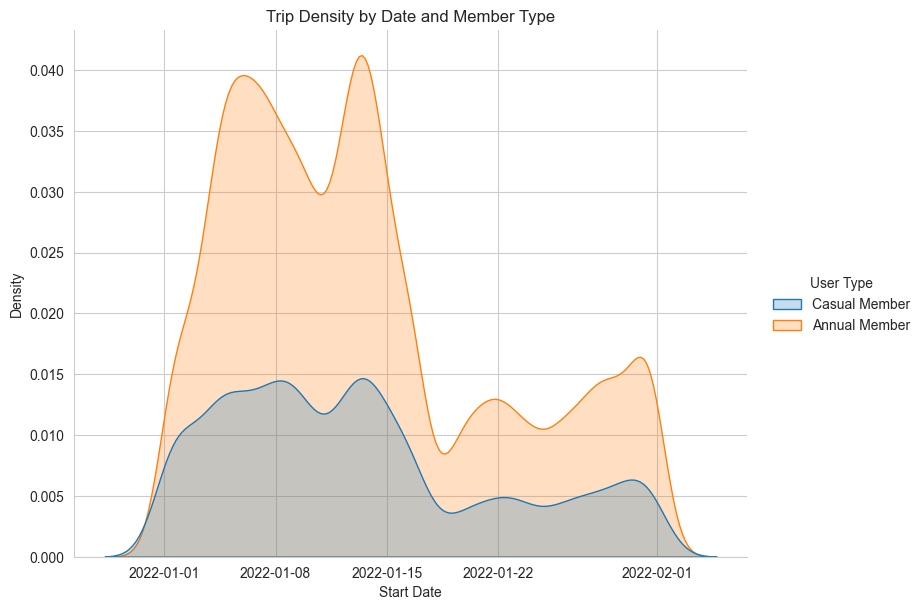

In [154]:
sns.displot(df_sorted_120, 
            x="Start Date", 
            hue="User Type", # try commenting this out and see what happens
            kind="kde", 
            fill=True,
            height=6, 
            aspect=11/8.5
            ).set(title = "Trip Density by Date and Member Type")

sns.despine()

It appears that trips peak in the first half of the month, with more trips taken by annual members than casual members, and are less frequent in the later half.

**Note that there is no kernel density plot  chart option in Excel or Google Sheets.**

## Bar chart

**Which stations have the largest number of trips that both start and end at that station?**

Now let's create a *[bar chart](https://en.wikipedia.org/wiki/Bar_chart)* that answers the question: which stations have the largest number of trips that both start and end at that station?

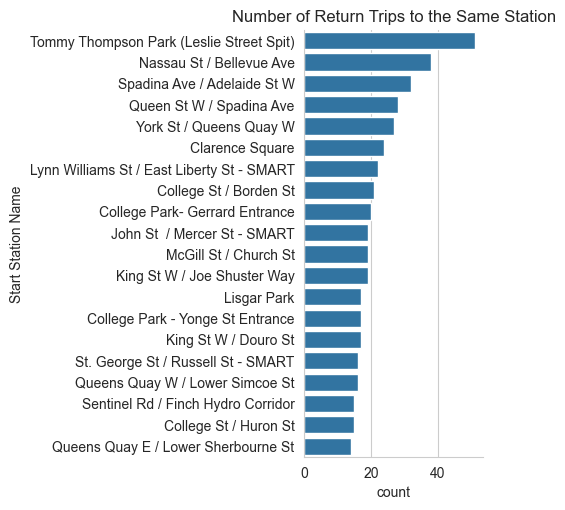

In [152]:
# Filter the data to trips where start station ID = end station ID
dfs = df.loc[df["Start Station Id"] == df["End Station Id"]]

# Group by station and count the number of trips
dfs = dfs.groupby("Start Station Name").size().reset_index(name = "count")

# Create a bar plot of the top 20 stations, shown in descending order of trips
sns.catplot(data= dfs.sort_values("count", ascending = False).head(20), 
            x='count', 
            y='Start Station Name',
            kind="bar"
            ).set(title = "Number of Return Trips to the Same Station")

sns.despine()

Tommy Thompson Park is the station with the most round trip bike rides, followed by Nassau St / Bellevue Ave and Spadina Ave / Adelaide St W.

**Why do you think these stations have the most "round trip" rides? What additional analysis could you do to explore the potential reasons why?**

**There are different ways to replicate this analysis In Excel or Google Sheets**, though in most cases it will require additional steps. Here is one way to replicate the analysis: 

- First, create a new column to categorize whether a trip started and ended at the same station. So for example, if your ‘Start Station’ variable is Column E, your ‘End Station’ variable is Column F, and your new categorization column is Column G, your IF statement should be G2=IF(E2=F2, “Same start and end stations”, “Different stations”). Drag your formula down to all your rows. 

- Second, create a pivot table. Drag your newly created variable into the ‘Filter’ box, and uncheck “Different stations”. Then drag the ‘Start station’ variable into your ‘Rows’ box, and your trip ID into your ‘Values’ box and make sure you select ‘Count’ (as opposed to Sum or Average, for example). This will give you a count of the number of trips that started and ended at the same station, by station. 

- You can then sort your pivot table in descending order based on this count (i.e. largest to smallest number of trips per station). 

- You can then copy-paste this table into a new tab, and use this to create a new bar chart. Select the appropriate data array, click ‘Insert’, then ‘Bar Chart’ under Chart Type.

## Line chart

**How does daily average temperature change over time?**

What if we are curious about the relationship between bike share trips and temperature? Maybe we have a hypothesis that more people tend to use bike share when it's warmer. Let's test this hypothesis by first loading and examining another dataset, which includes the daily temperature in January 2022, and joining it with our bike share data.

Let's load in our weather data, which was already downloaded for you from the federal government's [historical climate data website](https://climate.weather.gc.ca/index_e.html).

In [77]:
df_weather = pd.read_csv("data/toronto-historical-weather-2022.csv")

# don't hide any of the column names, even though there are a lot
pd.set_option('display.max_columns', None)

df_weather.head() # show the first 5 rows

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),Max Temp Flag,Min Temp (°C),Min Temp Flag,Mean Temp (°C),Mean Temp Flag,Heat Deg Days (°C),Heat Deg Days Flag,Cool Deg Days (°C),Cool Deg Days Flag,Total Rain (mm),Total Rain Flag,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-79.4,43.67,TORONTO CITY,6158355,2022-01-01,2022,1,1,NaN,5.1,NaN,-2.1,NaN,1.5,NaN,16.5,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,M,NaN,M
1,-79.4,43.67,TORONTO CITY,6158355,2022-01-02,2022,1,2,NaN,-2.1,NaN,-10.5,NaN,-6.3,NaN,24.3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,NaN,M,NaN,M
2,-79.4,43.67,TORONTO CITY,6158355,2022-01-03,2022,1,3,NaN,-4.0,NaN,-12.9,NaN,-8.4,NaN,26.4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3.0,NaN,NaN,M,NaN,M
3,-79.4,43.67,TORONTO CITY,6158355,2022-01-04,2022,1,4,NaN,3.3,NaN,-5.7,NaN,-1.2,NaN,19.2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3.0,NaN,NaN,M,NaN,M
4,-79.4,43.67,TORONTO CITY,6158355,2022-01-05,2022,1,5,NaN,4.9,NaN,-4.5,NaN,0.2,NaN,17.8,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.3,NaN,3.0,NaN,NaN,M,NaN,M


Given that there are so many column names in the dataframe, it might also be easier to look only at the column names, instead of the first 5 rows of data:

In [78]:
df_weather.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

We only need to keep the `Date/Time` and `Mean Temp (°C)` variables, so let's subset the dataframe to only those columns:

In [105]:
df_weather_simp = df_weather[["Date/Time", "Mean Temp (°C)"]]
df_weather_simp.head()

,Date/Time,Mean Temp (°C)
0,2022-01-01,1.5
1,2022-01-02,-6.3
2,2022-01-03,-8.4
3,2022-01-04,-1.2
4,2022-01-05,0.2


Now let's join the weather dataframe with our original bike share dataframe on their respective date/time columns. First, let's remind ourselves which column in the `df` bike share dataframe has the date of the trip.

In [159]:
df.head(2) # only show the first 2 rows

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Trip Duration Minutes,Start Date,Date Only,date
0,14805109,4335,7334,01/01/2022 00:02,Simcoe St / Wellington St North,7269.0,01/01/2022 01:15,Toronto Eaton Centre (Yonge St),5139,Casual Member,72.25,2022-01-01 00:02:00,2022-01-01,2022-01-01
1,14805110,126,7443,01/01/2022 00:02,Dundas St E / George St,7270.0,01/01/2022 00:05,Church St / Dundas St E - SMART,3992,Annual Member,2.10,2022-01-01 00:02:00,2022-01-01,2022-01-01


The `Start Date` column is the one we want to use -- `Start Time` also contains the date but we don't need to know what time the trip started, just the date. We have to make sure that this variable has the same data type in each of the dataframes -- if not, the join (`merge`) won't work.

In [86]:
df['Start Date'].dtype

dtype('<M8[ns]')

In [88]:
df_weather_simp['Date/Time'].dtype

dtype('O')

The variables have different types, so we need to convert them so they're the same type:

In [106]:
# Create new 'Date Only' column by extracting only the date from the datetime variable in the bike share data
df['date'] = df['Start Date'].dt.date

# Convert the 'Date/Time' variable from string to date 
df_weather_simp.loc[:, 'Date/Time'] = pd.to_datetime(df_weather_simp['Date/Time']).dt.date

In [98]:
df['date'].dtype

dtype('O')

In [107]:
df_weather_simp['Date/Time'].dtype

dtype('O')

Now we can merge the dataframes, using the `date` column in the bike share dataset and the `Date/Time` column in the weather dataset.

In [160]:
df_ridership_weather = df.merge(df_weather_simp, 
                                left_on="date", 
                                right_on="Date/Time")

df_ridership_weather.head(2)

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type,Trip Duration Minutes,Start Date,Date Only,date,Date/Time,Mean Temp (°C)
0,14805109,4335,7334,01/01/2022 00:02,Simcoe St / Wellington St North,7269.0,01/01/2022 01:15,Toronto Eaton Centre (Yonge St),5139,Casual Member,72.25,2022-01-01 00:02:00,2022-01-01,2022-01-01,2022-01-01,1.5
1,14805110,126,7443,01/01/2022 00:02,Dundas St E / George St,7270.0,01/01/2022 00:05,Church St / Dundas St E - SMART,3992,Annual Member,2.10,2022-01-01 00:02:00,2022-01-01,2022-01-01,2022-01-01,1.5


Let's first explore the average temperature for each day in January 2022 by creating a *[line chart](https://en.wikipedia.org/wiki/Line_chart)*.

[Text(0.5, 1.0, 'Daily Average Temperature in January 2022')]

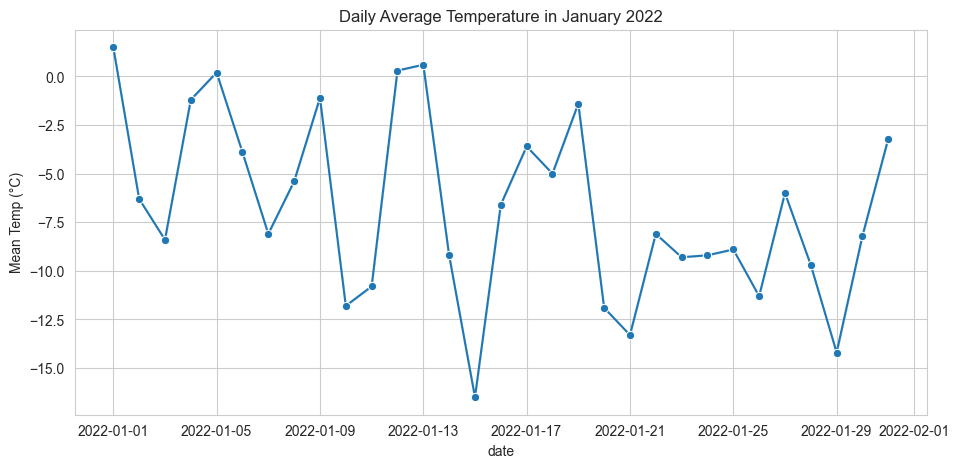

In [157]:
fig, ax = plt.subplots(figsize=(11, 5))

sns.lineplot(data=df_ridership_weather, 
             x='date', 
             y='Mean Temp (°C)',
             marker = "o"
             ).set(title = "Daily Average Temperature in January 2022")

## Scatter plot with trend line

**Are bike share trips more common when the weather is warmer?**

Next, we'll calculate the number of trips (i.e., rows) for each date, and then create a *[scatter plot](https://en.wikipedia.org/wiki/Scatter_plot)* of the number of trips versus the average temperature for every day in January 2022. We'll include a *trend (or "[regression](https://en.wikipedia.org/wiki/Linear_regression)") line* to illustrate the relationship between the two variables.

[Text(0.5, 1.0, 'Number of Bike Share Trips vs Daily Temperature in January 2022')]

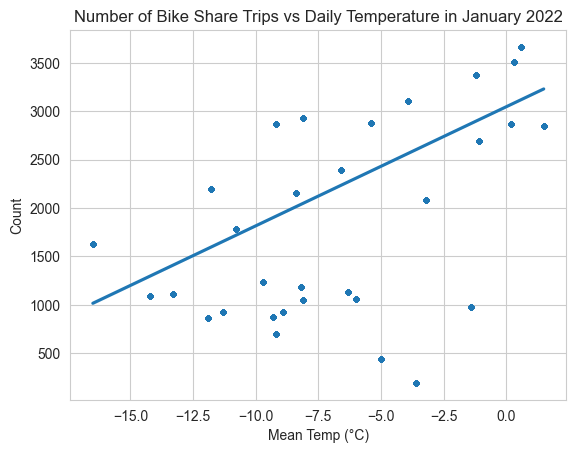

In [158]:
# Count the number of rows (trips) by date
df_ridership_weather['Count'] = df_ridership_weather.groupby('date')['date'].transform('count')

sns.regplot(data=df_ridership_weather, 
            x="Mean Temp (°C)", 
            y="Count", 
            scatter_kws={"s": 8}
            ).set(title = "Number of Bike Share Trips vs Daily Temperature in January 2022")

The trend line has a positive slope, indicating there is a positive relationship between average daily temperature and number of trips.

We can also determine how highly correlated the two variables are by calculating the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) using the [`pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) function from the `stats` module of the `scipy` library.

In [139]:
from scipy.stats import pearsonr

pearsonr(df_ridership_weather["Mean Temp (°C)"], df_ridership_weather["Count"])

PearsonRResult(statistic=0.6499094259264812, pvalue=0.0)

The *Pearson correlation coefficient* (0.65) is positive and relatively close to 1, which means there is a moderately strong positive linear relationship between the number of daily trips and the temperature. A value of 0 would indicate no correlation, while a value close to -1 would indicate a strong negative relationship.

The *p-value* is very small (<0.05), meaning the correlation is *statistically significant* (i.e., there is strong evidence that the correlation is real).

We can conclude that our hypothesis was correct: more people tend to use bike share when it's warmer. However, given that we only looked at the *correlation* between these two variables, we are not able to establish *causation*. In other words, we can say that there is a relationship, but we cannot say why. We are just in the exploratory phase of the data analysis process, and to say anything more about the reason for the relationship we would need to do more in-depth modeling.

**There are different ways to replicate this analysis In Excel or Google Sheets**, though it will require additional steps. Here is one way to replicate the analysis: 

- First, as noted above, open the weather dataset and clean it so as to only keep the most relevant columns (date and temperature). 

- Then, as noted above, make sure that the variable you will use to join the datasets - the date - is formatted in the same way in both datasets. This means you will need to adjust the formatting in the bike share dataset to match the way the date variable is formatted in the weather dataset.

- Then, join the two datasets using the VLOOKUP function. You can review the previously linked VLOOKUP tutorial here. 

- Once your two datasets are joined, create a new pivot table to summarize the number of trips per day. Drag the ‘date’ field into your ‘Rows’ box, and the ‘trip ID’ into your ‘Values’ box, and make sure to select ‘Count’. 

- Copy-paste your pivot table into a new tab. Now, join your temperature variable back into this new table/tab. In other words, you are trying to create a table where each row is a unique day, and the columns are the number of trips, and average temperature. 

- From here, select the appropriate data array to create a scatter plot that charts the number of trips against average temperature. As explained previously, you can do this by clicking on ‘Insert’ under Chart Type, then selecting ‘Scatter Plot’. 

- Once your scatter plot is displayed, you can add a linear trendline, model equation, and R-square value as described previously in this textbook. 

- Finally, you can manually calculate the Pearson correlation coefficient using the =PEARSON function.